In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df['Fare'].mean()

32.2042079685746

In [45]:
df[df['Sex']=='male']['Age'].mean()

30.72664459161148

In [46]:
df[(df['Survived']==0) & (df['Sex']=='male')]['Age'].max()

74.0

In [47]:
df.loc[0:5, 'PassengerId':'Name']

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"
5,6,0,3,"Moran, Mr. James"


In [48]:
df.iloc[0:5, 0:4]

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


In [49]:
df[-1:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [50]:
df[:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [51]:
columns_to_show=['Fare','Age']
df.groupby(['Survived'])[columns_to_show].describe(percentiles=[])

Fare                                               Age             \
          count       mean        std  min   50%       max  count       mean   
Survived                                                                       
0         549.0  22.117887  31.388207  0.0  10.5  263.0000  424.0  30.626179   
1         342.0  48.395408  66.596998  0.0  26.0  512.3292  290.0  28.343690   

                                       
                std   min   50%   max  
Survived                               
0         14.172110  1.00  28.0  74.0  
1         14.950952  0.42  28.0  80.0

In [52]:
columns_to_show=['Fare','Age']
df.groupby(['Survived'])[columns_to_show].agg([np.max, np.min, np.mean])

Fare                   Age                 
              amax amin       mean  amax  amin       mean
Survived                                                 
0         263.0000  0.0  22.117887  74.0  1.00  30.626179
1         512.3292  0.0  48.395408  80.0  0.42  28.343690

In [53]:
pd.crosstab(df['Sex'], df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [54]:
pd.pivot_table(
    df,
    values=['Fare','Age'],
    index=['Pclass'],
    aggfunc='mean'
)

,Age,Fare
Pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550


In [55]:
ff=df['Age'] < 18
df.insert(loc=len(df.columns), column='<18', value=ff)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,<18
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [56]:
df['<30']=df['Age'] < 30
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,<18,<30
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False


In [58]:
df=df.drop(['<18','<30'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
pd.crosstab(df['Survived'],df['Sex'], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


Text(0.5,1,'Распределение выживших')

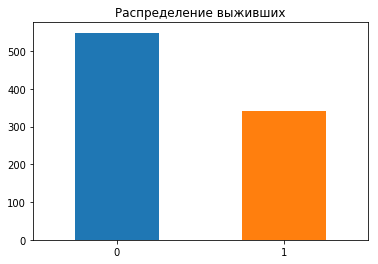

In [64]:
df['Survived'].value_counts().plot(kind='bar', rot=0)
plt.title('Распределение выживших')


 
Количество погибших превышает количество выживших

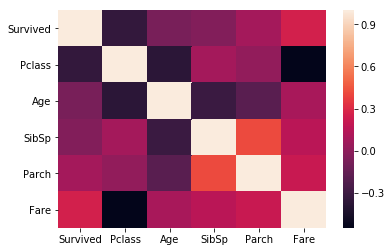

In [68]:
corr_matrix = df.drop(['PassengerId', 
                       'Name',
                       'Ticket', 
                       'Cabin',
                       'Embarked'], axis=1).corr()
sns.heatmap(corr_matrix);

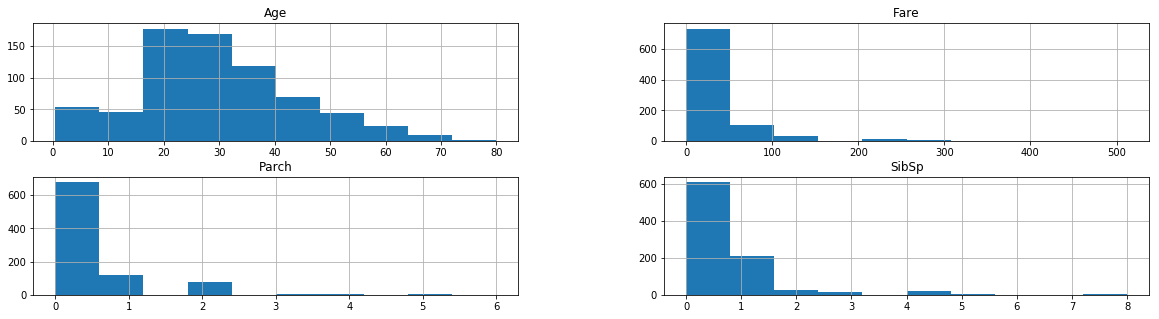

In [78]:
features = list(set(df.columns)- set(['PassengerId', 'Survived', 'Pclass', 'Name',
                                    'Sex','Ticket', 'Cabin','Embarked']))
df[features].hist(figsize=(20,5));


 Средний возраст пассажиров от 20 до 30 лет.
 Цена билета в пределах 50

In [77]:
df[features].head()

,Fare,SibSp,Parch,Age
0,7.2500,1,0,22.0
1,71.2833,1,0,38.0
2,7.9250,0,0,26.0
3,53.1000,1,0,35.0
4,8.0500,0,0,35.0


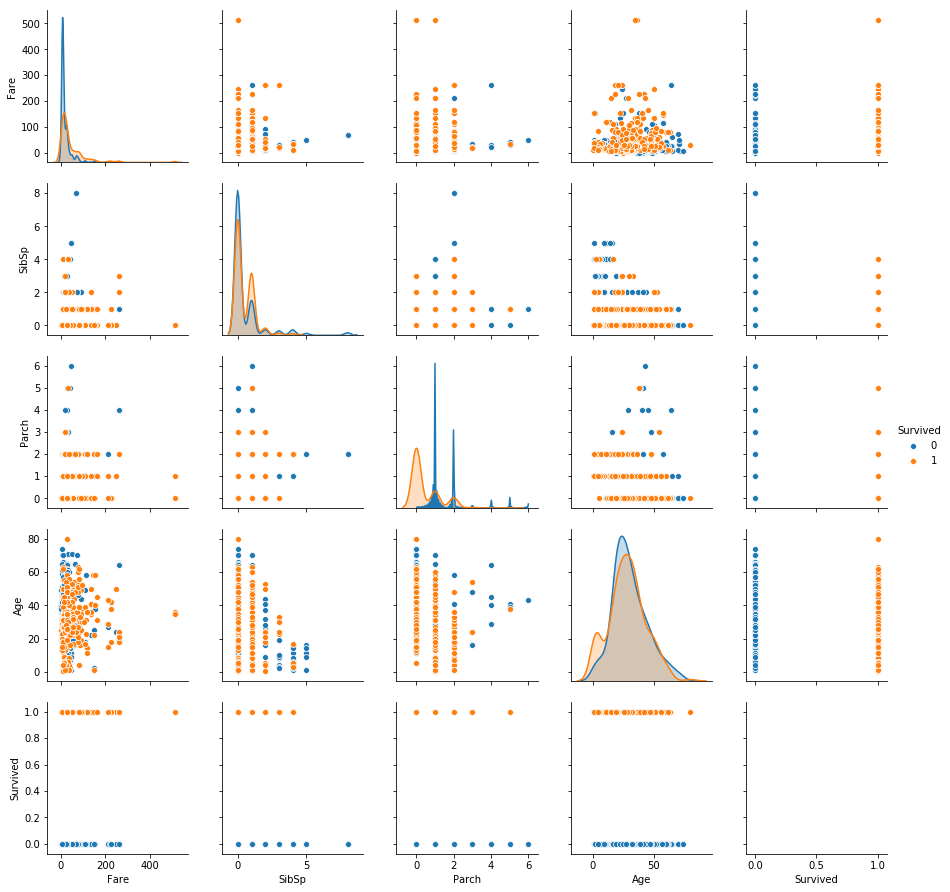

In [75]:
sns.pairplot(df[features+['Survived']],hue='Survived');

 Распределение количественных признаков с помощью pairplot

(<Figure size 1152x432 with 2 Axes>, array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E8F28D080>,
      dtype=object))


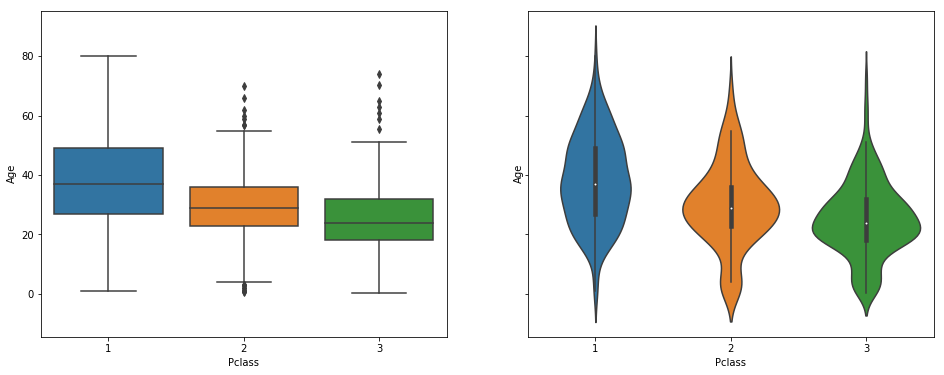

In [81]:
arr = plt.subplots(1,2, sharey=True, figsize=(16,6))
print(arr)
axes = arr[1]
sns.boxplot(x='Pclass', y='Age', data=df, ax=axes[0]);
sns.violinplot(x='Pclass', y='Age', data=df, ax=axes[1]);

Медиана распределения приходится на возраст ближе к 38 годам у первого класса, к 30 годам у второго класса, и 23 у третьего .
Размах распределения показывает, что средний возраст у трех классов от 20 до 40 лет

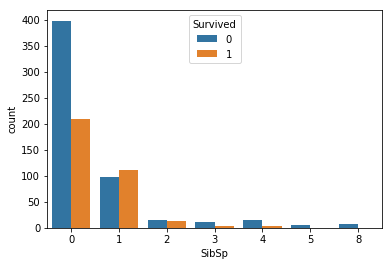

In [82]:
sns.countplot(x='SibSp', hue='Survived', data=df);


Отношение числа выживших и пассажиров, имеющих братьев/сестер
Основное количество пассажиров не имели братьев/сестер.
Около 400 пассажиров без братьев/сестер погибли, только половина выжили.
В случае, когда у пассажира 1 или 2 брата/сестры шансы выжить или погибнуть практически на равных.
Когда у пассажира от 3х братьев/сестер то шансы выжить падают.

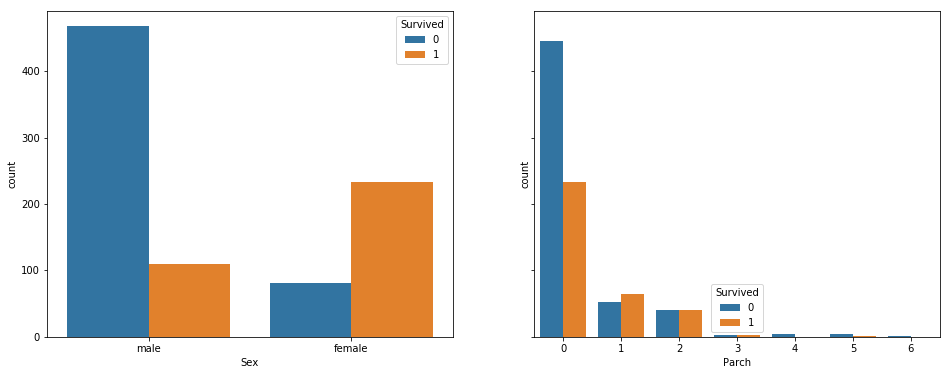

In [83]:
_, axes=plt.subplots(1, 2, sharey=True,figsize=(16,6))
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0]); 
sns.countplot(x='Parch', hue='Survived', data=df,ax=axes[1]);

Распределение числа выживших по полу и количеству детей
2 распределения: слева по полу(мужской,женский), справа по количеству детей у пассажиров

 Шанс выжить у мужчин в 5 раз ниже, чем у женщин
 Большая часть мужчин и женщин ехали без детей. Шанс погибнуь у таких в два раза больше, чем выжить.
 Шансы выжить у пар с 1 или 2 детьми 50/50.
 С увеличением количества детей шансы выжить уменьшаются.


In [86]:
df.groupby(['Pclass'])['Age'].agg([np.min]).sort_values(by='amin', ascending=False).T

Pclass,1,2,3
amin,0.92,0.67,0.42
